In [10]:
!pip install opencv-python
!pip install scikit-image

In [16]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from numpy.lib.stride_tricks import as_strided
import PIL
from pandas import DataFrame
import pandas as pd
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import json
import os
from itertools import product
import itertools
import random
import glob

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
if "google.colab" in str(get_ipython()):
    from google.colab.patches import cv2_imshow

    imshow = cv2_imshow
else:

    def imshow(img):
        img = img.clip(0, 255).astype("uint8")
        if img.ndim == 3:
            if img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
            else:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display(PIL.Image.fromarray(img))

In [13]:
def h_color(a, interpolation=None, size=None, fy=1.5, fx=1.5, cmap="gray"):
    s = [int(a.shape[0] * fy), int(a.shape[1] * fx)] if size is None else size
    plt.figure(figsize=s)
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        labelleft=False,
        left=False,
        right=False,
    )
    plt.imshow(a, cmap=cmap, interpolation=interpolation)

In [14]:
css = """
<style type="text/css">
  table, td, table.dataframe, table.dataframe td {
    border: 1px solid black;    //border: double;
    border-collapse: collapse;
    border-style: solid;
    border-spacing: 0px;
    background-color: rgb(250,250,250);
    width: 24px;
    height: 24px;
    text-align: center;
    transform: scale(1.0);
    margin: 5px;
    }
</style>
"""


def h(s):
    return display(HTML(css + DataFrame(s).to_html(header=False, index=False)))

In [15]:
def h_color_3d(z):
    fig = go.Figure(data=[go.Surface(z=z)])
    fig.update_layout(autosize=False, width=500, height=500)
    fig.show()

### Load Data

Range : 090422 - 090612

Loading .npy files from c:\Users\tidia\OneDrive\Bureau\PUT\CV\CV_Project1\dataset
12
['c:\\Users\\tidia\\OneDrive\\Bureau\\PUT\\CV\\CV_Project1\\dataset\\090422.npy', 'c:\\Users\\tidia\\OneDrive\\Bureau\\PUT\\CV\\CV_Project1\\dataset\\090432.npy', 'c:\\Users\\tidia\\OneDrive\\Bureau\\PUT\\CV\\CV_Project1\\dataset\\090442.npy', 'c:\\Users\\tidia\\OneDrive\\Bureau\\PUT\\CV\\CV_Project1\\dataset\\090452.npy', 'c:\\Users\\tidia\\OneDrive\\Bureau\\PUT\\CV\\CV_Project1\\dataset\\090502.npy']
Found 12 files between 090422 and 090612


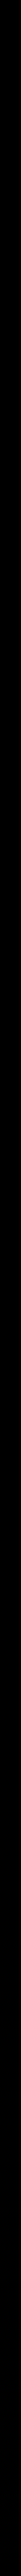

ets


In [ ]:
# Load .npy files between 090422 and 090612 (relative path to dataset)
import os
import glob
import numpy as np
import pandas as pd
from pathlib import Path

# Relative path (relative to the notebook working directory, typically the `src` folder)
# Using a relative path makes it portable: '../dataset'
data_dir = os.path.normpath(os.path.join('..', 'dataset'))
print(f'Loading .npy files from (relative) {data_dir}')

pattern = os.path.join(data_dir, '*.npy')
files = sorted(glob.glob(pattern))
start = '090422'
end = '090612'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

print(f'Total .npy found in {data_dir}:', len(files))
print(f'Selected .npy in range {start}..{end}:', len(selected))
print('First 5 selected files:', [os.path.basename(f) for f in selected[:5]])

loaded_npy = {}
summary = []
for f in selected:
    arr = np.load(f)
    name = os.path.basename(f)
    loaded_npy[name] = arr
    summary.append({
        "file": name,
        "shape": arr.shape,
        "dtype": str(arr.dtype),
        "min": float(np.min(arr)) if arr.size else None,
        "max": float(np.max(arr)) if arr.size else None,
        "mean": float(np.mean(arr)) if arr.size else None
    })

print(f'Found {len(selected)} files between {start} and {end}')
df = pd.DataFrame(summary)
display(df)

# Display first image (uses existing imshow helper defined earlier)
if selected:
    try:
        imshow(loaded_npy[os.path.basename(selected[0])])
    except Exception as e:
        print('Cannot display image in this environment:', e)
else:
    print('No files selected in the requested range.')
